In [168]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [5]:
yosemite_visitors = pd.read_csv("Resources/yosem.csv")
yosemite_visitors

,Field1,Field2,Field3,Field4,RecreationHours,NonRecreationHours,Field5,Field6,Field7,Field8,...,Textbox24,Textbox32,Field23,Field24,Field25,Field26,Field27,Field28,Textbox7,Field29
0,1979,January,"72,701","3,053","2,098,509","87,519","30,515",442,405,0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
1,1979,February,"72,926","3,030","2,098,838","86,785","37,744",500,971,0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
2,1979,March,"87,950","3,751","2,511,342","105,268","46,752",731,"1,010",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
3,1979,April,"136,275","5,477","3,897,346","152,005","57,796","7,446","2,758",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
4,1979,May,"210,756","7,765","5,805,477","204,231","82,611","40,206","34,947",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2022,August,"518,407","18,927","8,568,440","446,062","74,599","64,920","34,024",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
524,2022,September,"424,374","15,920","6,137,404","389,778","63,271","34,167","20,928",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
525,2022,October,"381,612","14,251","5,418,446","348,997","59,441","32,323","26,584",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
526,2022,November,"178,786","7,773","2,634,129","214,985","39,016","10,421","12,100",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"


In [6]:
new_yosemite = yosemite_visitors.rename(columns={
    "Field1": "Year",
    "Field2": "Month",
    "Field3": "Recreation Visitors", 
    "Field4": "Non-Recreation Visitors",
    "RecreationHours": "Recreation Hours",
    "NonRecreationHours": "Non-Recreation Hours", 
    "Field5": "Concession Lodging",
    "Field6": "Tent Campers",
    "Field7": "RV Campers", 
    "Field9": "Backcountry Campers",
    "TotalOvernightStays": "Total Overnight Stays"
})

In [7]:
new_yosemite

,Year,Month,Recreation Visitors,Non-Recreation Visitors,Recreation Hours,Non-Recreation Hours,Concession Lodging,Tent Campers,RV Campers,Field8,...,Textbox24,Textbox32,Field23,Field24,Field25,Field26,Field27,Field28,Textbox7,Field29
0,1979,January,"72,701","3,053","2,098,509","87,519","30,515",442,405,0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
1,1979,February,"72,926","3,030","2,098,838","86,785","37,744",500,971,0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
2,1979,March,"87,950","3,751","2,511,342","105,268","46,752",731,"1,010",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
3,1979,April,"136,275","5,477","3,897,346","152,005","57,796","7,446","2,758",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
4,1979,May,"210,756","7,765","5,805,477","204,231","82,611","40,206","34,947",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2022,August,"518,407","18,927","8,568,440","446,062","74,599","64,920","34,024",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
524,2022,September,"424,374","15,920","6,137,404","389,778","63,271","34,167","20,928",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
525,2022,October,"381,612","14,251","5,418,446","348,997","59,441","32,323","26,584",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"
526,2022,November,"178,786","7,773","2,634,129","214,985","39,016","10,421","12,100",0,...,"3,066,135,089","143,582,950","37,601,934","22,793,748","12,053,190",0,"5,447,593","953,134",0,"78,849,599"


In [8]:
clean_yosemite = new_yosemite[["Year", "Month", "Recreation Visitors", "Non-Recreation Visitors", "Recreation Hours", "Non-Recreation Hours", "Concession Lodging", "Tent Campers", "RV Campers", "Backcountry Campers", "Total Overnight Stays"]].copy()

In [9]:
clean_yosemite

,Year,Month,Recreation Visitors,Non-Recreation Visitors,Recreation Hours,Non-Recreation Hours,Concession Lodging,Tent Campers,RV Campers,Backcountry Campers,Total Overnight Stays
0,1979,January,"72,701","3,053","2,098,509","87,519","30,515",442,405,914,"32,276"
1,1979,February,"72,926","3,030","2,098,838","86,785","37,744",500,971,"1,112","40,327"
2,1979,March,"87,950","3,751","2,511,342","105,268","46,752",731,"1,010","1,549","50,042"
3,1979,April,"136,275","5,477","3,897,346","152,005","57,796","7,446","2,758","2,778","70,778"
4,1979,May,"210,756","7,765","5,805,477","204,231","82,611","40,206","34,947","11,652","169,416"
...,...,...,...,...,...,...,...,...,...,...,...
523,2022,August,"518,407","18,927","8,568,440","446,062","74,599","64,920","34,024","34,372","213,443"
524,2022,September,"424,374","15,920","6,137,404","389,778","63,271","34,167","20,928","20,432","143,412"
525,2022,October,"381,612","14,251","5,418,446","348,997","59,441","32,323","26,584","6,431","125,371"
526,2022,November,"178,786","7,773","2,634,129","214,985","39,016","10,421","12,100",375,"62,150"


In [10]:
#clean_yosemite["Date"] = clean_yosemite["Month"] + ' ' + clean_yosemite["Year"].astype(str)
clean_yosemite["Recreation Visitors"] = clean_yosemite["Recreation Visitors"].str.replace(",", "").astype(float)
clean_yosemite

,Year,Month,Recreation Visitors,Non-Recreation Visitors,Recreation Hours,Non-Recreation Hours,Concession Lodging,Tent Campers,RV Campers,Backcountry Campers,Total Overnight Stays
0,1979,January,72701.0,"3,053","2,098,509","87,519","30,515",442,405,914,"32,276"
1,1979,February,72926.0,"3,030","2,098,838","86,785","37,744",500,971,"1,112","40,327"
2,1979,March,87950.0,"3,751","2,511,342","105,268","46,752",731,"1,010","1,549","50,042"
3,1979,April,136275.0,"5,477","3,897,346","152,005","57,796","7,446","2,758","2,778","70,778"
4,1979,May,210756.0,"7,765","5,805,477","204,231","82,611","40,206","34,947","11,652","169,416"
...,...,...,...,...,...,...,...,...,...,...,...
523,2022,August,518407.0,"18,927","8,568,440","446,062","74,599","64,920","34,024","34,372","213,443"
524,2022,September,424374.0,"15,920","6,137,404","389,778","63,271","34,167","20,928","20,432","143,412"
525,2022,October,381612.0,"14,251","5,418,446","348,997","59,441","32,323","26,584","6,431","125,371"
526,2022,November,178786.0,"7,773","2,634,129","214,985","39,016","10,421","12,100",375,"62,150"


In [86]:
jan = clean_yosemite.loc[clean_yosemite["Month"] == "January"]
feb = clean_yosemite.loc[clean_yosemite["Month"] == "February"]
mar = clean_yosemite.loc[clean_yosemite["Month"] == "March"]
apr = clean_yosemite.loc[clean_yosemite["Month"] == "April"]
may = clean_yosemite.loc[clean_yosemite["Month"] == "May"]
jun = clean_yosemite.loc[clean_yosemite["Month"] == "June"]
jul = clean_yosemite.loc[clean_yosemite["Month"] == "July"]
aug = clean_yosemite.loc[clean_yosemite["Month"] == "August"]
sep = clean_yosemite.loc[clean_yosemite["Month"] == "September"]
oct = clean_yosemite.loc[clean_yosemite["Month"] == "October"]
nov = clean_yosemite.loc[clean_yosemite["Month"] == "November"]
dec = clean_yosemite.loc[clean_yosemite["Month"] == "December"]

In [98]:
def get_season(month):
    if month in ["December", "January", "February"]:
        return "Winter"
    elif month in ["March", "April", "May"]:
        return "Spring"
    elif month in ["June", "July", "August"]:
        return "Summer"
    elif month in ["September", "October", "November"]:
        return "Fall"
    else:
        return "Unknown"

# Apply the function to create a new 'Season' column
clean_yosemite['Season'] = clean_yosemite['Month'].apply(get_season)
clean_yosemite

,Year,Month,Recreation Visitors,Non-Recreation Visitors,Recreation Hours,Non-Recreation Hours,Concession Lodging,Tent Campers,RV Campers,Backcountry Campers,Total Overnight Stays,Season
0,1979,January,72701.0,"3,053","2,098,509","87,519","30,515",442,405,914,"32,276",Winter
1,1979,February,72926.0,"3,030","2,098,838","86,785","37,744",500,971,"1,112","40,327",Winter
2,1979,March,87950.0,"3,751","2,511,342","105,268","46,752",731,"1,010","1,549","50,042",Spring
3,1979,April,136275.0,"5,477","3,897,346","152,005","57,796","7,446","2,758","2,778","70,778",Spring
4,1979,May,210756.0,"7,765","5,805,477","204,231","82,611","40,206","34,947","11,652","169,416",Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
523,2022,August,518407.0,"18,927","8,568,440","446,062","74,599","64,920","34,024","34,372","213,443",Summer
524,2022,September,424374.0,"15,920","6,137,404","389,778","63,271","34,167","20,928","20,432","143,412",Fall
525,2022,October,381612.0,"14,251","5,418,446","348,997","59,441","32,323","26,584","6,431","125,371",Fall
526,2022,November,178786.0,"7,773","2,634,129","214,985","39,016","10,421","12,100",375,"62,150",Fall


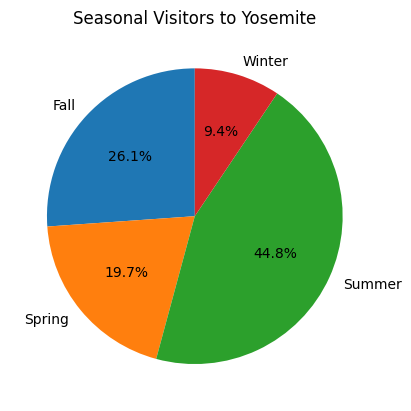

In [271]:
seasonal_totals = clean_yosemite.groupby(clean_yosemite["Season"])["Recreation Visitors"].sum()
plt.pie(seasonal_totals, labels=seasonal_totals.index, autopct='%1.1f%%', startangle=90)
plt.title("Seasonal Visitors to Yosemite")
plt.savefig("output/seasonal_visitors_yosemite.png")
#line graph comparing the seasons by year

Text(0.5, 1.0, 'Monthly Visitors to Yosemite')

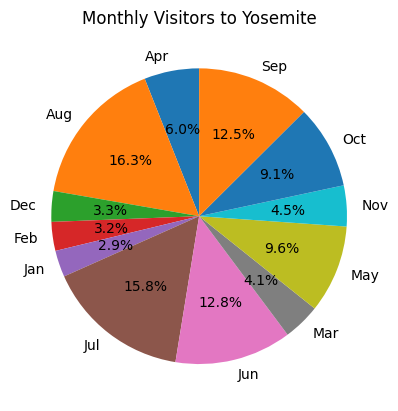

In [272]:
monthly_totals = clean_yosemite.groupby(clean_yosemite['Month'].str.slice(0, 3))['Recreation Visitors'].sum()
plt.pie(monthly_totals, labels=monthly_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Monthly Visitors to Yosemite')

In [273]:
yose_group = clean_yosemite.groupby("Year")["Recreation Visitors"].sum().reset_index()
yose_group

,Year,Recreation Visitors
0,1979,2350782.0
1,1980,2490282.0
2,1981,2516893.0
3,1982,2415587.0
4,1983,2457464.0
5,1984,2738467.0
6,1985,2831952.0
7,1986,2876717.0
8,1987,3152275.0
9,1988,3216681.0


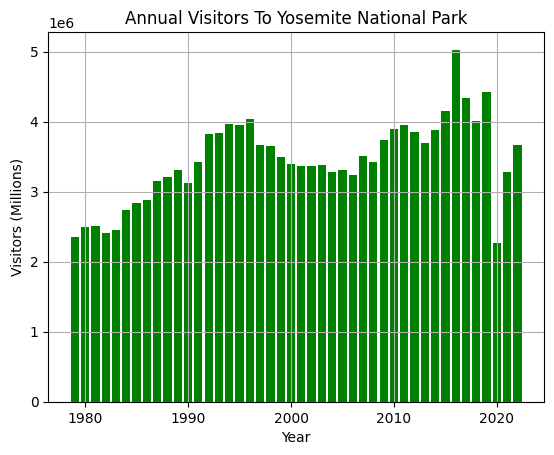

In [274]:
plt.bar(yose_group["Year"], yose_group["Recreation Visitors"], color="green")
plt.title("Annual Visitors To Yosemite National Park")
plt.xlabel("Year")
plt.ylabel("Visitors (Millions)")
plt.grid(True)
plt.savefig("output/annual_visitation.png")
#one insight per slide

In [275]:
visitors_2023 = pd.read_csv("Resources/yosevisitors.csv")
visitors_2023.dropna()

,GroupDescription,Label,ThisMonth,SameMonthLastYear,PercentChange,ThisYearYTD,LastYearYTD,PercentChangeYTD,FiscalYearYTD
0,Arch Rock,Visitors by Auto,"89,773","74,108",21.1,"725,274","653,104",11.1,"888,613"
1,Arch Rock,Visitors by Bus,"7,440","2,324",220.1,"45,825","18,965",141.6,"51,209"
2,Arch Rock,Total Recreation Visitors,"97,213","76,432",27.2,"771,099","672,069",14.7,"939,822"
3,Arch Rock,Total Non-Rec Visitors,"3,470","2,851",21.7,"28,011","25,137",11.4,"34,296"
4,Arch Rock,Number of Buses,273,105,160.0,"2,007","1,023",96.2,"2,250"
5,South Entrance,Visitors by Auto,"175,818","111,704",57.4,"1,098,260","900,478",22.0,"1,328,556"
6,South Entrance,Visitors by Bus,"7,116","5,470",30.1,"39,442","27,466",43.6,"46,619"
7,South Entrance,Total Recreation Visitors,"182,934","117,174",56.1,"1,137,702","927,944",22.6,"1,375,175"
8,South Entrance,Total Non-Rec Visitors,"9,934","6,318",57.2,"62,067","50,843",22.1,"75,063"
9,South Entrance,Number of Buses,396,295,34.2,"2,556","1,814",40.9,"2,980"


In [276]:
visitors_2023["FiscalYearYTD"] = visitors_2023["FiscalYearYTD"].str.replace(",", "").astype(float)
vis_groups_1 = visitors_2023.groupby("Label")["FiscalYearYTD"].sum().reset_index()
vis_groups_1

,Label,FiscalYearYTD
0,Number of Buses,15600.0
1,Total Non-Rec Visitors,302032.0
2,Total Recreation Visitors,7269582.0
3,Visitors by Auto,7097757.0
4,Visitors by Bus,261634.0


In [277]:
#vis_groups_1 = vis_groups_1[vis_groups_1['GroupDescription'] != 'ReportText'].reset_index(drop=True)
#vis_groups_1

In [278]:
visitors_2017 = pd.read_csv("Resources/peak_yos.csv")
visitors_2017.dropna()

,GroupDescription,Label,ThisMonth,SameMonthLastYear,PercentChange,ThisYearYTD,LastYearYTD,PercentChangeYTD,FiscalYearYTD
0,Arch Rock,Visitors by Auto,"129,830","89,180",45.6,"948,358","797,086",19.0,"1,144,752"
1,Arch Rock,Visitors by Bus,"20,214","20,346",-0.6,"134,240","148,320",-9.5,"172,468"
2,Arch Rock,Total Recreation Visitors,"150,044","109,526",37.0,"1,082,598","945,406",14.5,"1,317,220"
3,Arch Rock,Total Non-Rec Visitors,"5,051","4,236",19.2,"36,841","31,881",15.6,"44,506"
4,Arch Rock,Number of Buses,689,"7,370",-90.7,"4,545","12,075",-62.4,"5,809"
5,South Entrance,Visitors by Auto,"107,173","140,483",-23.7,"977,511","1,195,427",-18.2,"1,206,684"
6,South Entrance,Visitors by Bus,"9,609","11,844",-18.9,"53,635","75,327",-28.8,"71,738"
7,South Entrance,Total Recreation Visitors,"116,782","152,327",-23.3,"1,031,146","1,270,754",-18.9,"1,278,422"
8,South Entrance,Total Non-Rec Visitors,"6,072","7,963",-23.7,"55,219","67,577",-18.3,"68,198"
9,South Entrance,Number of Buses,343,470,-27.0,"2,131","2,899",-26.5,"2,834"


In [279]:
visitors_2017["FiscalYearYTD"] = visitors_2017["FiscalYearYTD"].str.replace(",", "").astype(float)
vis_groups_2 = visitors_2017.groupby("Label")["FiscalYearYTD"].sum().reset_index()
vis_groups_2

,Label,FiscalYearYTD
0,Number of Buses,23332.0
1,Total Non-Rec Visitors,332549.0
2,Total Recreation Visitors,8797434.0
3,Visitors by Auto,8240206.0
4,Visitors by Bus,609264.0


In [280]:
all_park_visits = pd.read_csv("Resources/annual_visitation.csv")
all_park_clean = (all_park_visits.dropna()).copy()

In [281]:
all_park_clean['TRV'] = all_park_clean['TRV'].replace(',', '', regex=True).astype(float)
visits_by_year = all_park_clean.groupby("Year")["TRV"].sum().reset_index()
visits_by_year_1979_sum = visits_by_year.loc[visits_by_year["Year"] > 1978]
visits_by_year_1979_sum

,Year,TRV
75,1979,52605100.0
76,1980,53921174.0
77,1981,57163980.0
78,1982,57406687.0
79,1983,58491521.0
80,1984,57335469.0
81,1985,58287491.0
82,1986,62375241.0
83,1987,65638052.0
84,1988,66093316.0


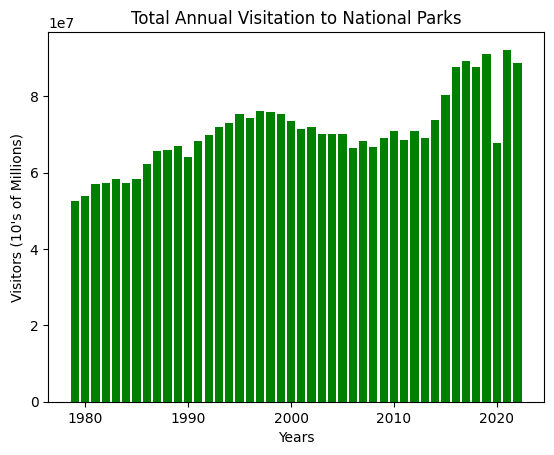

In [282]:
plt.bar(visits_by_year_1979_sum["Year"], visits_by_year_1979_sum["TRV"], color="green")
plt.title("Total Annual Visitation to National Parks")
plt.xlabel("Years")
plt.ylabel("Visitors (10's of Millions)")
plt.savefig("output/total_annual_visits.png")

In [127]:
all_park_clean['TRV'] = all_park_clean['TRV'].replace(',', '', regex=True).astype(float)
visits_by_year = all_park_clean.groupby("Year")["TRV"].mean().reset_index()
visits_by_year_1979_avg = visits_by_year.loc[visits_by_year["Year"] > 1978]
visits_by_year_1979_avg

,Year,TRV
75,1979,9.564564e+05
76,1980,9.803850e+05
77,1981,1.039345e+06
78,1982,9.567781e+05
79,1983,9.748587e+05
80,1984,9.399257e+05
81,1985,9.401208e+05
82,1986,1.006052e+06
83,1987,1.058678e+06
84,1988,1.066021e+06


Text(0.5, 1.0, 'Average Annual NPS Visitors Per Park')

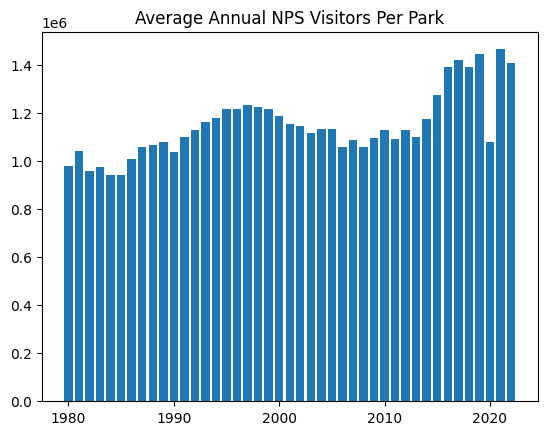

In [123]:
plt.bar(visits_by_year_1979["Year"], visits_by_year_1979["TRV"])
plt.title("Average Annual NPS Visitors Per Park")


In [234]:
all_park_clean["TRV"] = all_park_clean["TRV"].replace(",", "")
all_park_clean

,RegionName,ParkName,ParkType,Year,TRV
0,Alaska Region,Denali NP & PRES,National Park,2022,427562.0
1,Alaska Region,Denali NP & PRES,National Park,2021,229521.0
2,Alaska Region,Denali NP & PRES,National Park,2020,54850.0
3,Alaska Region,Denali NP & PRES,National Park,2019,601152.0
4,Alaska Region,Denali NP & PRES,National Park,2018,594660.0
...,...,...,...,...,...
7439,Southeast Region,Virgin Islands NP,National Park,1961,30600.0
7440,Southeast Region,Virgin Islands NP,National Park,1960,27200.0
7441,Southeast Region,Virgin Islands NP,National Park,1959,19800.0
7442,Southeast Region,Virgin Islands NP,National Park,1958,13900.0


In [185]:
region_groups = all_park_clean.groupby("RegionName")["TRV"].sum().reset_index()
region_groups

,RegionName,TRV
0,Alaska Region,4.863973e+07
1,Intermountain Region,1.502017e+09
2,Midwest Region,5.921609e+08
3,Northeast Region,3.594135e+08
4,Pacific West Region,1.034460e+09
5,Southeast Region,8.014114e+08


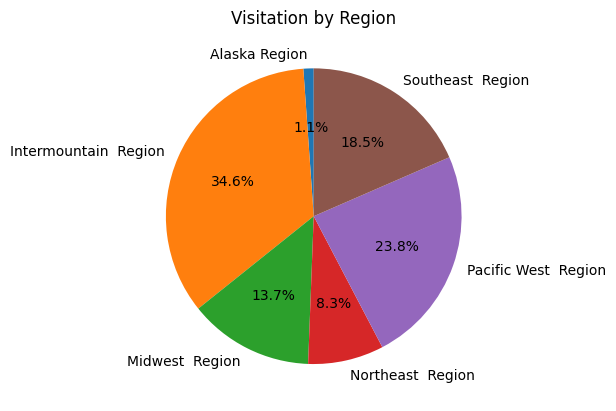

In [230]:
plt.pie(region_groups["TRV"], labels=region_groups["RegionName"], autopct='%1.1f%%', startangle=90)
plt.title("Visitation by Region")
plt.savefig("output/visitation_by_region.png")

In [200]:
smokys = all_park_clean.loc[all_park_clean["ParkName"] == "Great Smoky Mountains NP"]
gc = all_park_clean.loc[all_park_clean["ParkName"] == "Grand Canyon NP"]
zion = all_park_clean.loc[all_park_clean["ParkName"] == "Zion NP"]
rm = all_park_clean.loc[all_park_clean["ParkName"] == "Rocky Mountain NP"]
acadia = all_park_clean.loc[all_park_clean["ParkName"] == "Acadia NP"]
yosemite = all_park_clean.loc[all_park_clean["ParkName"] == "Yosemite NP"]

top_parks_df = pd.concat([smokys, gc, zion, rm, acadia, yosemite], ignore_index=True)
top_parks_equal = top_parks_df.loc[top_parks_df["Year"] > 1930]

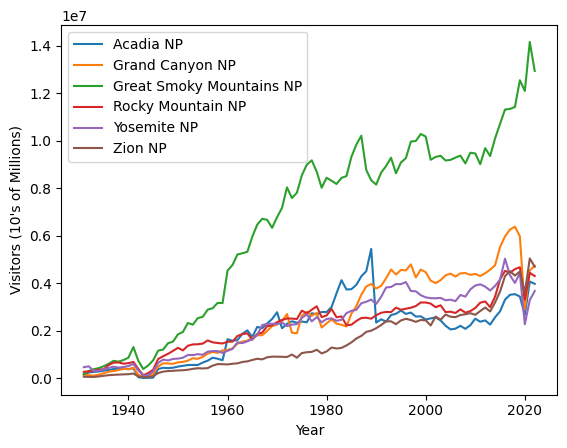

In [263]:
fig,ax=plt.subplots()
names = ["Acadia NP", "Grand Canyon NP", "Great Smoky Mountains NP", "Rocky Mountain NP", "Yosemite NP", "Zion NP"]
for name in names:
    top_parks_equal[top_parks_equal["ParkName"] == name].plot(x="Year", y="TRV", ax=ax, label=name)
plt.ylabel("Visitors (10's of Millions)")
plt.savefig("output/top_parks.png")

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Great Smoky Mountains NP'),
  Text(2, 0, 'Grand Canyon NP'),
  Text(3, 0, 'Zion NP'),
  Text(4, 0, 'Rocky Mountain NP'),
  Text(5, 0, 'Acadia NP'),
  Text(6, 0, 'Yosemite NP')])

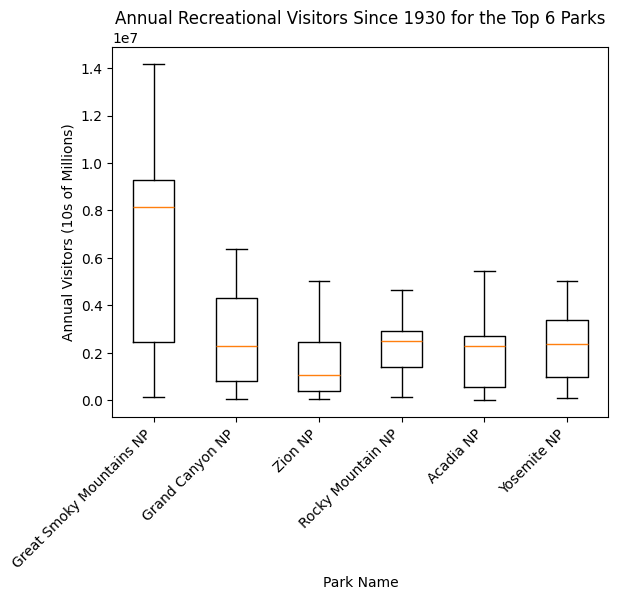

In [201]:
park_names = top_parks_equal["ParkName"].unique()
data_by_park = [top_parks_equal[top_parks_equal["ParkName"] == park]["TRV"].values for park in park_names]
data_by_park = np.array([arr.astype(float) for arr in data_by_park])
plt.boxplot(data_by_park.T, labels=park_names, flierprops=dict(marker="o", markerfacecolor="red", markersize=8))
plt.xlabel("Park Name")
plt.ylabel("Annual Visitors (10s of Millions)")
plt.title("Annual Recreational Visitors Since 1930 for the Top 6 Parks")
plt.xticks(rotation=45, ha="right")

The r-squared is: 0.9663545601390136


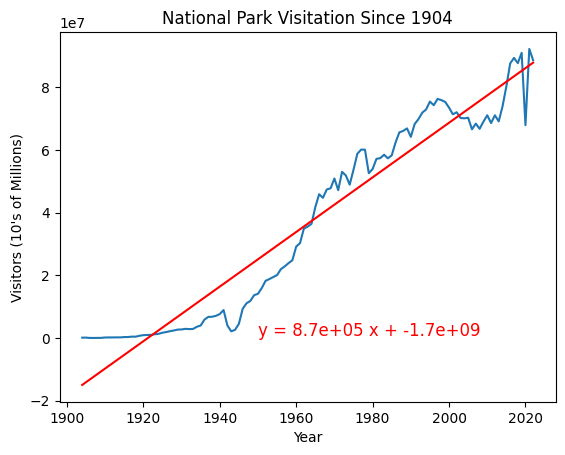

In [284]:
annual_totals = all_park_clean.groupby("Year")["TRV"].sum().reset_index()
annual_totals
plt.plot(annual_totals["Year"], annual_totals["TRV"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(annual_totals["Year"], annual_totals["TRV"])
regress_values = annual_totals["Year"] * slope + intercept
slope_str = "{:,.2g}".format(slope)
intercept_str = "{:,.2g}".format(intercept)
# Construct the line equation string with commas
line_eq = "y = " + slope_str + " x + " + intercept_str
plt.plot(annual_totals["Year"], regress_values, color="red")
plt.annotate(line_eq, (1950, 750000), fontsize=12, color="red")
print(f"The r-squared is: {rvalue}")
plt.title("National Park Visitation Since 1904")
plt.xlabel("Year")
plt.ylabel("Visitors (10's of Millions)")
plt.savefig("output/trend_over_time.png")

In [131]:
park_types = pd.read_csv("Resources/by_park_type.csv")
park_types.dropna()

,Heading,ParkName,RecreationVisits,NonRecreationVisits,RecreationVisitorHours,NonRecreationVisitorHours,ConcessionerLodgingOvernights,ConcessionerCampingOvernights,TentOvernights,RecreationVehicleOvernights,...,ReportTotalNonRecreationVisits,ReportTotalRecreationVisitorHours,ReportTotalNonRecreationVisitorHours,ReportTotalConcessionerLodgingOvernights,ReportTotalConcessionerCampingOvernights,ReportTotalTentOvernights,ReportTotalRecreationVehicleOvernights,ReportTotalBackcountryOvernights,ReportTotalNonRecreationOvernights,ReportTotalMiscellaneousOvernights
0,International Historic Site,Saint Croix Island IHS,"12,139",0,"15,173",0,0,0,0,0,...,"162,749,156","1,358,946,990","86,933,436","2,735,836","1,418,619","3,269,989","2,567,070","1,865,698","43,383","1,353,523"
1,National Battlefield,Antietam NB,"115,619",0,"240,414",0,0,0,0,0,...,"162,749,156","1,358,946,990","86,933,436","2,735,836","1,418,619","3,269,989","2,567,070","1,865,698","43,383","1,353,523"
2,National Battlefield,Big Hole NB,"54,781",0,"74,509",0,0,0,0,0,...,"162,749,156","1,358,946,990","86,933,436","2,735,836","1,418,619","3,269,989","2,567,070","1,865,698","43,383","1,353,523"
3,National Battlefield,Cowpens NB,"212,534",0,"191,020",0,0,0,0,0,...,"162,749,156","1,358,946,990","86,933,436","2,735,836","1,418,619","3,269,989","2,567,070","1,865,698","43,383","1,353,523"
4,National Battlefield,Fort Donelson NB,"183,638","433,806","122,350","14,315",0,0,0,0,...,"162,749,156","1,358,946,990","86,933,436","2,735,836","1,418,619","3,269,989","2,567,070","1,865,698","43,383","1,353,523"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Park (Other),President's Park,"714,224",0,"1,097,104",0,0,0,0,0,...,"162,749,156","1,358,946,990","86,933,436","2,735,836","1,418,619","3,269,989","2,567,070","1,865,698","43,383","1,353,523"
385,Park (Other),Prince William Forest Park,"294,916",120,"3,349,004",240,0,"27,792","17,231","2,104",...,"162,749,156","1,358,946,990","86,933,436","2,735,836","1,418,619","3,269,989","2,567,070","1,865,698","43,383","1,353,523"
386,Park (Other),Rock Creek Park,"2,026,156","12,419,553","2,607,428","6,209,774",0,0,0,0,...,"162,749,156","1,358,946,990","86,933,436","2,735,836","1,418,619","3,269,989","2,567,070","1,865,698","43,383","1,353,523"
387,Park (Other),White House,"236,380",0,"340,532",0,0,0,0,0,...,"162,749,156","1,358,946,990","86,933,436","2,735,836","1,418,619","3,269,989","2,567,070","1,865,698","43,383","1,353,523"


In [155]:
park_types["RecreationVisits"] = park_types["RecreationVisits"].str.replace(",", "")
park_groups = park_types.groupby("Heading")["RecreationVisits"].sum().reset_index()
park_groups

,Heading,RecreationVisits
0,International Historic Site,12139
1,National Battlefield,1156195478121253418363825829312711153681180907...
2,National Battlefield Park,1322003532727173124241998
3,National Historic Site,1761446010952873260573907657912301258596587673...
4,National Historical Park,2657071284883483212324615564148114159442861852...
5,National Lakeshore,2549529256851501117
6,National Memorial,2279130668617673131359173150760603402293465593...
7,National Military Park,9642727562967645763890576777323865681992387205...
8,National Monument,2974316357752017950396210941020396453657680761...
9,National Park,3970260146065210068095141077010232972572354660...
